PROJECT:

Based on Hickey's analysis we can say that Fandango inflated (rounded up) the actual ratings and presented wrongful information via website.
At that moment Fandango mentioned a bug in system.

GOAL:

We will analyse this same issue again with current movie ratings to find if there is any change in the Hickey's analysis.

In [1]:
import pandas as pd
fandango_before=pd.read_csv('fandango_score_comparison.csv')
fandango_after=pd.read_csv('movie_ratings_16_17.csv')

In [2]:
fandango_before=fandango_before[['FILM','Fandango_Stars',
                                'Fandango_Ratingvalue',
                                'Fandango_votes',
                                'Fandango_Difference']].copy()
fandango_after=fandango_after[['movie','year','fandango']].copy()
fandango_before.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [4]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


# Understanding the Data

#### Our goal is to determine if there is any change in the fandango's rating system after Hickey's analysis.

#### Population of our interest : All ratings on the fandango website no matter which year it's release is.

We need to do sampling based on 2 factors:
    1. Time before Hickey's analysis
    2. Time after Hickey's analysis
So, We will have 2 samples based on 2 parameters (1 & 2).


In Hickey's analysis (Sampling Criteria):
    1. movie having atleast 30 fan ratings (Time of sampling is 24 August , 2015)
    2. Sale of tickets was on in 2015
    
The sampling done was clearly not Random because not all movies had equal chance to be selected out. Some movies that does not satisfy above criteria are clearly no even applicable to be placed in the sample collected.

Thus, this sampling concludes that the sample might not be good representation of the population on Fandango. More likely the sample does no trepresent the population.

In our sample (Sampling Criteria):
    1. Movie must have been released in 2016 or later.
    2. Movie must have considerable number of votes and reviews (this is unclear from the readme.md from Hickey's analysis)

The trend in second sample collected by another person is also unpredictable and cannot be considered as a proper representation for the population.
Both people use purposive sampling (intentional selection of informants based on their ability to elucidate a specific concept.

# Changing the Goal of our Analysis

Current alternatives for us:
    1. Collect new data
    2. Change goal of our analysis by placing some limitations on it.

Tweaking our goal is a much faster way rather than collection of new data (kind of impossible task).

The new goal is to identify any changes in the ratings of popular movies in year 2015 and populat movies in the year 
2016.

The new goal is still a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

# Isolating the Samples We Need

Before continuing we need to describe the proper meaning of vague "popular"-movies (for both 2015 & 2016).

For now, we will use parameter of Hickey's analysis that means a movie is considered popular only if it has 30 fan ratings or more on Fandango's website.

In [5]:
fa_sample=fandango_after.sample(10,random_state=1)
fa_sample

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above observations,
on visiting the website of fandango we can clearly observe that atleast 90% of movies (sample of 10) we selected randomly is having customer ratings more than 30. So, they clearly satisfy the need for our analysis.

# Isolating the Samples We Need

For now,
opportunities we need to describe,

    1. All Fandango's ratings for popular movies released in 2015
    2. All Fandango's ratings for popular movies released in 2016
    
Term "ppular is vague" so, need to clearly define it's meaning properly.

Based on Hickey's analysis we can say that any movie that has reviews of 30 or more is to be considered as a popular movies but if lesser than 30 then the movie is not considered as a popular-movie.

In [6]:
# Isolating the movie data based on year of release.
# Extracting the year out of FILM name from Hickey's dataset

fandango_before['Year']=fandango_before['FILM'].str[-5:-1]
fandango_before.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [10]:
print(fandango_before['Year'].value_counts())
fan_15 = fandango_before[fandango_before['Year'] == '2015'].copy()
fan_15.head(2)
print(fan_15['Year'].value_counts())

2015    129
2014     17
Name: Year, dtype: int64
2015    129
Name: Year, dtype: int64


In [11]:
print(fandango_after['year'].value_counts())
fan_16=fandango_after[fandango_after['year']==2016]
print(fan_16['year'].value_counts())
fan_16.head(2)

2016    191
2017     23
Name: year, dtype: int64
2016    191
Name: year, dtype: int64


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


#### Now, we will use the datasets "fan_15" and "fan_16" for continuing our analysis.

# Comparing Distribution Shapes for  2015 and 2016 movies 
### ( dataset -> fan_15 and fan_16 )

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

([<matplotlib.axis.XTick at 0x7f59d3ccecf8>,
 <a list of 11 Text xticklabel objects>)

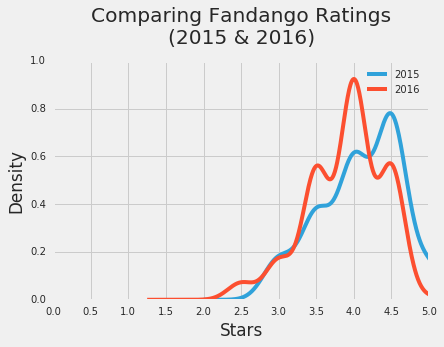

In [13]:
%matplotlib inline
plt.style.use('fivethirtyeight')

fan_15['Fandango_Stars'].plot.kde(label='2015', legend=True)
fan_16['fandango'].plot.kde(label='2016', legend=True)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.title('Comparing Fandango Ratings\n(2015 & 2016)',
         y=1.05)
plt.xticks(np.arange(0,5.1,0.5))

From above kde (kernel density plots) we can now answer following questions:

    1. What is the shape of each distribution?
        ans. Both distributions are highly left skewed.
        
    2. How do their shapes compare?
        ans. The distribution for 2016 is slightly shifted towards left.
        
We can clearly observe,
the ratings on fandango is pretty high that makes the actual performance of the movie quite dubious.

But, the ratings in the year 2016 qre lesser than the ratings in 2015 that's why we see a left shift in the kde plot of the fandango ratings.
This tells us that yes, there is some changes in the fandango ratings system from the year 2015 to 2016.

Conclusion : 
Ratings in 2016 are less as compared to the ratings in 2015.
(Although the difference was only a slight one only)

In [14]:

print('2015 : ' + '\n' + '-' * 20)
fan_15['Fandango_Stars'].value_counts(normalize=True).sort_index() *100

2015 : 
--------------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [15]:
fan_16['fandango'].value_counts(normalize=True).sort_index() *100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

From above table we can clearly draw conclusions that,

1. In 2015 minimum rating was of 3.0 while in 2016 minimum rating is 2.5
2. In 2016 few ratings are higher than 2015 such as, 4.0 ratings showed increased by 12% (approx.), 3.5 shows increment by 6% (approx.). On contrary, 4.5 showed drop of 13% (approx.) and in 5.0 ratings we see drop from 7% to 0.5% (approx.)

But again the direction of change is not very clear when checked with the kernel density plot.

# Determining the Direction of the Change

In [24]:
# Finding the direction of the change by using the summary statistics

# Finding mean
fan_15_mean= fan_15['Fandango_Stars'].mean()
fan_16_mean= fan_16['fandango'].mean()

fan_15_median= fan_15['Fandango_Stars'].median()
fan_16_median= fan_16['fandango'].median()

fan_15_mode= fan_15['Fandango_Stars'].mode()[0]
fan_16_mode= fan_16['fandango'].mode()[0]

# Adding data to a new dataframe
summary = pd.DataFrame()

summary['2015'] = [fan_15_mean,fan_15_median,fan_15_mode]
summary['2016'] = [fan_16_mean,fan_16_median,fan_16_mode]
summary.index = ['mean','median','mode']
# print(fan_16_mode)

In [25]:
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


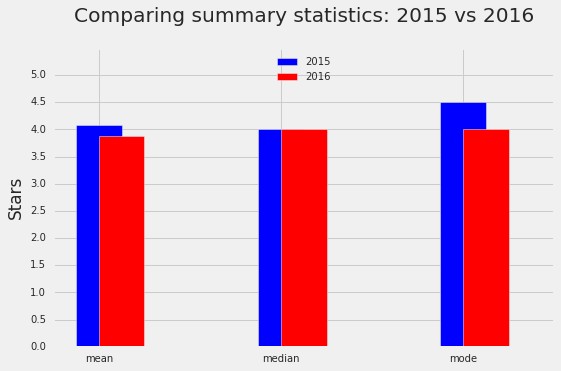

In [29]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = 'blue', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = 'red', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

Yes,
we can clearly see that ratings for movies in 2016 is lower than in the 2015.

But, we can still cannot conclude that this slight change is due to the change/fix in fandango biased rating system after Hickey's analysis.